## <center> PAYODA TECHNOLOGIES - Technical Assessment </center>

### Rosita Nimalin Cardoza - Loyola College 

<b>Importing Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<b>Importing Dataset

In [3]:
df = pd.read_csv('hepatitis_csv.csv')

In [4]:
df.shape

(155, 20)

The dataset has 155 rows and 20 features

In [5]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


### Imputation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

The above information shows that some the features have some null values. The features named steroid, fatigue, malaise and anorexia are having only one NaN value. This value can be replaced with the most occurred value of that column. 

In [7]:
def impute_Nan(cols):
    if df[cols].dtype == 'object':
        df[cols] = np.where(df[cols].isnull(), df[cols].mode(), df[cols])
    else:
        df[cols] = np.where(df[cols].isnull(), df[cols].mean(), df[cols])

for i in df.columns:
    if df[i].count()<155:
        impute_Nan(i)

The impute_Nan() function will replace the values in categorical variables with highest occurred values (mode) while in numerical variables the values are replace with the average of the column. 
This imputation is done instead of removing the columns as the dataset is small and any loss of data may lead to purposeless dataset for future modelling or analysis. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          155 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          155 non-null    object 
 5   malaise          155 non-null    object 
 6   anorexia         155 non-null    object 
 7   liver_big        155 non-null    object 
 8   liver_firm       155 non-null    object 
 9   spleen_palpable  155 non-null    object 
 10  spiders          155 non-null    object 
 11  ascites          155 non-null    object 
 12  varices          155 non-null    object 
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  protime         

Finally all the null values are removed from the dataset.

### Data Visualisation

In [9]:
plt.style.use('ggplot')

{'whiskers': [<matplotlib.lines.Line2D at 0x2356a8d22c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2356a8d2e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2356a8c3a08>],
 'medians': [<matplotlib.lines.Line2D at 0x2356a8dbb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2356a8dbc88>],
 'means': []}

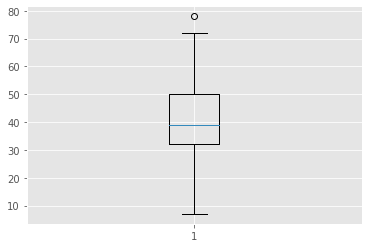

In [10]:
plt.boxplot(df['age'])

The age has one outlier

(array([ 1.,  3., 21., 29., 37., 21., 24., 11.,  6.,  2.]),
 array([ 7. , 14.1, 21.2, 28.3, 35.4, 42.5, 49.6, 56.7, 63.8, 70.9, 78. ]),
 <a list of 10 Patch objects>)

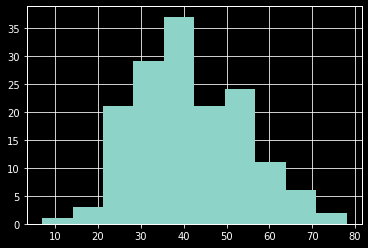

In [11]:
plt.style.use('dark_background')
plt.hist(df['age'])

The distribution of the age shows that people in the age group of 35-40 suffer from hepatitis

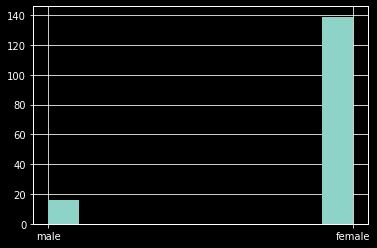

In [12]:
_ = plt.hist(df['sex'])

90% of the patients are female. 

In [13]:
pd.value_counts(df['sex'])

female    139
male       16
Name: sex, dtype: int64

In [14]:
Female_patients = df[df['sex']=='female']

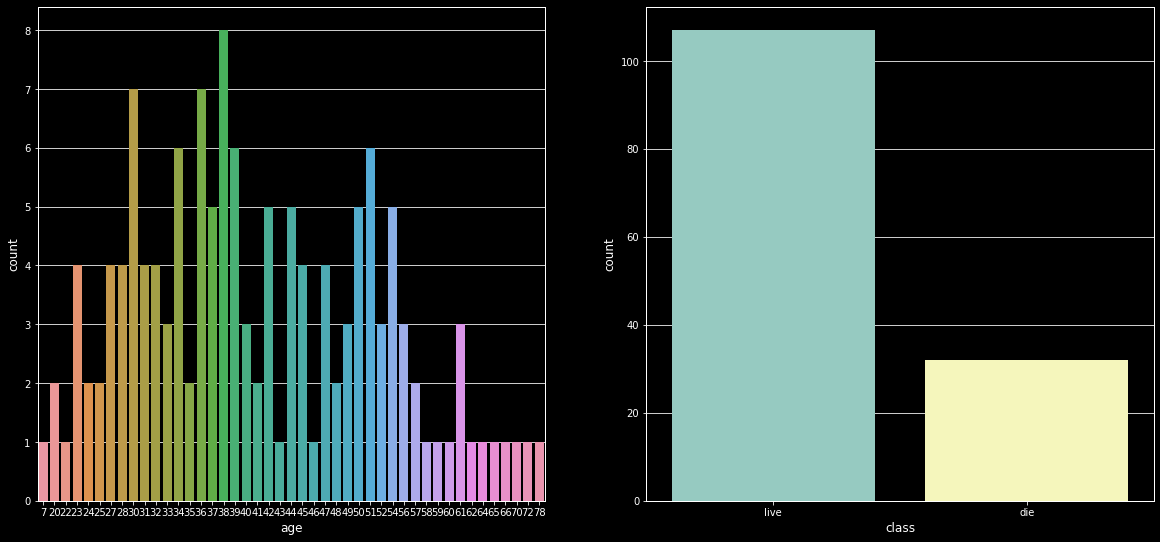

In [15]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.countplot(Female_patients['age'])
plt.subplot(2,2,2)
sns.countplot(Female_patients['class'])

The data shows that most of the female patients are in age group 30-40 and 80% of the female patients live 

In [16]:
plt.style.use('ggplot')


Class = df.groupby(['class','sex']).size()

In [17]:
Class

class  sex   
die    female     32
live   female    107
       male       16
dtype: int64

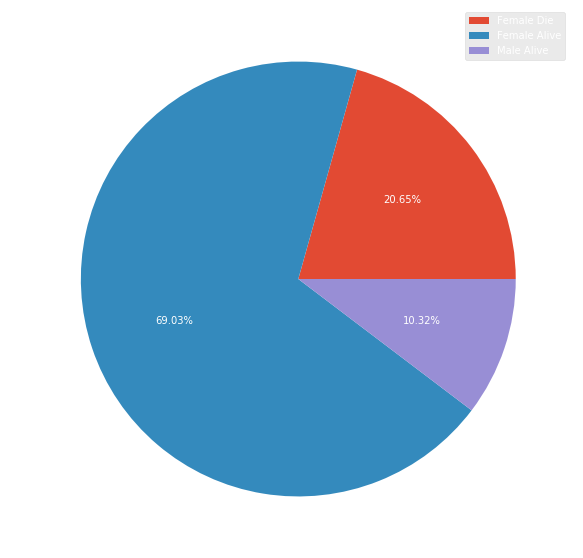

In [18]:
plt.figure(figsize = (10,10))
_ = plt.pie(Class,labels = ['Female Die', 'Female Alive', 'Male Alive'], autopct = '%1.2f%%' )
plt.legend()

There are no deaths in male patients. 

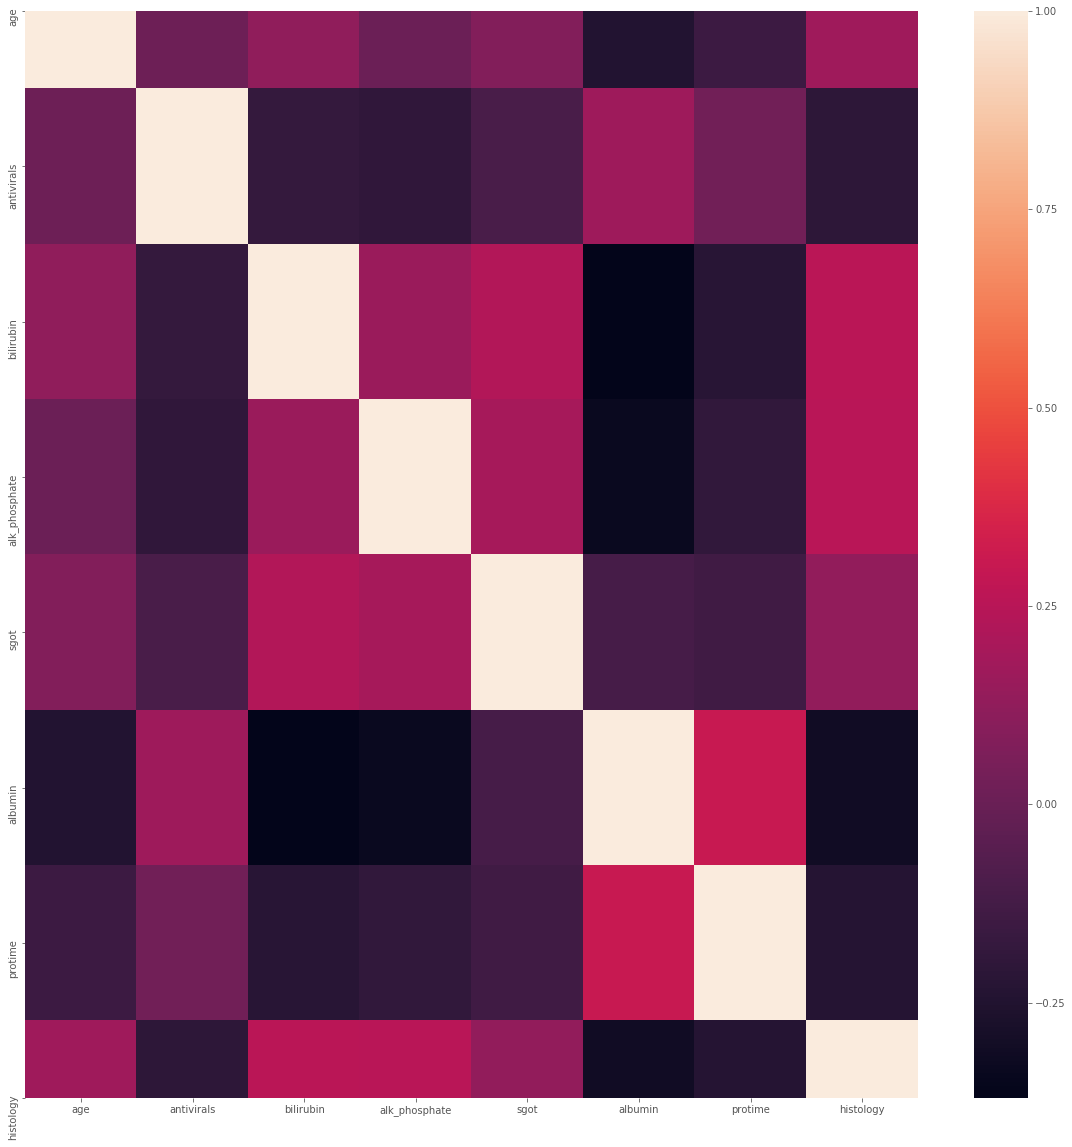

In [19]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr())

Most of the variable are negatively correlated. The feature are independent to each other. The albumin is highly negatively correlated with bilirubin, histology and alk_phosphate. So this suggests that if the albumin increases the other features may decrease or vice versa. 


### Distributions of the Dataset

In [20]:
x = df.iloc[:,13:18]
data_norm = (x - x.mean())/x.std()
data_norm

,bilirubin,alk_phosphate,sgot,albumin,protime
0,-0.359771,-4.379946e-01,-0.767347,0.296285,4.132617e-16
1,-0.443925,6.394619e-01,-0.496096,-0.514416,4.132617e-16
2,-0.612233,-2.009542e-01,-0.609117,0.296285,4.132617e-16
3,-0.612233,-1.278411e+00,-0.383075,0.296285,1.055498e+00
4,-0.359771,-1.531158e-15,1.289640,0.296285,4.132617e-16
...,...,...,...,...,...
150,5.194376,-1.531158e-15,1.764329,-0.838697,-6.893450e-01
151,-0.443925,4.455197e-01,0.634117,0.782706,4.132617e-16
152,-0.528079,-6.534859e-01,-0.744743,0.458425,4.132617e-16
153,0.060997,-5.241911e-01,-0.756045,0.458425,-8.056679e-01


Normalising the data to visualise their distributions

In [21]:
num_data = pd.concat([df.iloc[:,-1],data_norm], axis = 1)

In [22]:
num_data
df_melt = pd.melt(num_data, id_vars = 'class', var_name = 'features', value_name = 'values' )

df_melt


,class,features,values
0,live,bilirubin,-3.597714e-01
1,live,bilirubin,-4.439252e-01
2,live,bilirubin,-6.122327e-01
3,live,bilirubin,-6.122327e-01
4,live,bilirubin,-3.597714e-01
...,...,...,...
770,die,protime,-6.893450e-01
771,live,protime,4.132617e-16
772,live,protime,4.132617e-16
773,live,protime,-8.056679e-01


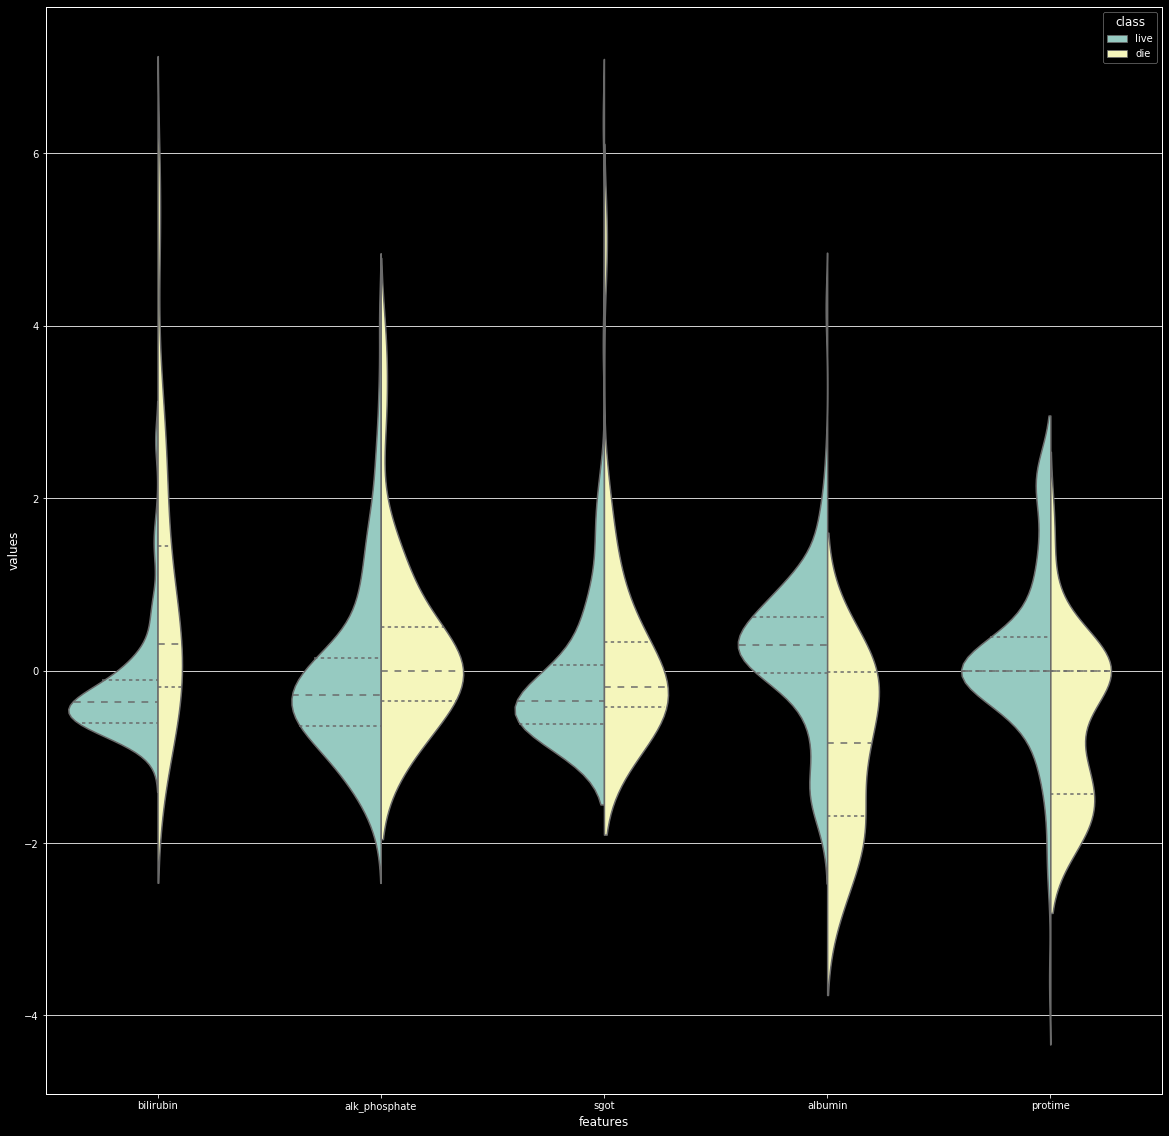

In [23]:
plt.style.use('dark_background')
plt.figure(figsize = (20,20))
sns.violinplot(x ='features', y = 'values', hue = 'class', data = df_melt, split = True, inner='quart')


The violinplot shows us the distributions of the variables. All the plotted variables have outliers in them. But all the variables are not overlapping thus they will classify the model more efficiently. 

# Insights
<ol>
    1. The given dataset shows that the most of the patients are in the age-group of 35-42.<br>
    2. Most of the patients are female, where 69.03% are alive while 20.65% are dead. This shows that with proper treatement the hepatitis is curable.<br>
    3. It is not threatening to male as we can see from the data that only 10.32% are affected and they alive. There are no deaths in male gender. This shows that female are more vulnerable to hepatitis than male. <br>
    4. The alubmin compound is negatively correlated with bilirubin, alk_phosphate, sgot and histology. So either when albumin increases the other compound will decrease and vice-versa. <br>
    5. The given dataset is a classification model. As the features are independent, the model can classify the patients as dead or alive based on the features. Through this we can save people's lives. 